<a href="https://colab.research.google.com/github/magmatic654/Alura-Store_Latam/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de datos



In [109]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Unir las tiendas en un solo DataFrame

In [110]:
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

df_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4])
df_tiendas.sample(5)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
914,Balón de voleibol,Deportes y diversión,53400.0,3100.0,15/02/2020,Izabela de León,Bogotá,5,Nequi,1,4.60971,-74.08175,Tienda 1
2287,Silla de oficina,Muebles,509900.0,28400.0,30/11/2022,Rafael Acosta,Bogotá,5,Tarjeta de crédito,1,4.60971,-74.08175,Tienda 3
1510,Auriculares,Electrónicos,67600.0,4600.0,29/03/2021,Felipe Santos,Cali,4,Tarjeta de crédito,1,3.43722,-76.52250,Tienda 4
1097,Set de ollas,Artículos para el hogar,111700.0,4100.0,26/06/2022,Beatriz Morales,Riohacha,1,Tarjeta de crédito,1,11.54444,-72.90722,Tienda 3
1520,Balón de voleibol,Deportes y diversión,40000.0,0.0,27/06/2021,Rafael Acosta,Bogotá,5,Tarjeta de crédito,3,4.60971,-74.08175,Tienda 2


#1. Análisis de facturación




## Calcular los ingresos de cada tienda

In [111]:
ingresos_por_tienda = df_tiendas.groupby('Tienda')['Precio'].sum().rename('Ingresos')
ingresos_por_tienda

,Ingresos
Tienda,
Tienda 1,1.150880e+09
Tienda 2,1.116344e+09
Tienda 3,1.098020e+09
Tienda 4,1.038376e+09


## Determinar la tienda con menores ingresos

In [112]:
tienda_menor_ingreso = ingresos_por_tienda.idxmin()
menor_ingreso = ingresos_por_tienda.min()
print(tienda_menor_ingreso, 'con', menor_ingreso)


Tienda 4 con 1038375700.0


### Insertar grafico



Titulo: La tienda [Tienda menos ingresos] genera menos dinero

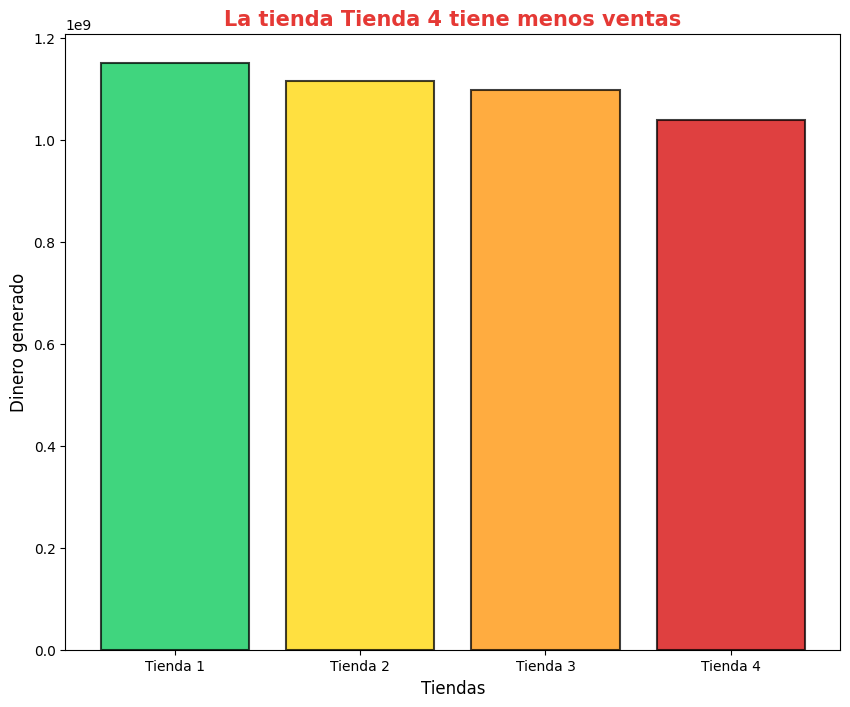

In [286]:
from numpy import shape
import matplotlib.pyplot as plt

paleta_caida = [
    '#00C853',  # Nivel 1: Verde intenso (mejor desempeño)
    '#FFD600',  # Nivel 2: Amarillo fuerte (algo por debajo)
    '#FF9100',  # Nivel 3: Naranja intenso (ya preocupa)
    '#D50000',  # Nivel 4: Rojo fuerte (peor desempeño / caída más grande)
]

titulo = f"La tienda {tienda_menor_ingreso} tiene menos ventas"

plt.figure(figsize=(10, 8))

plt.bar(ingresos_por_tienda.index, ingresos_por_tienda, color=paleta_caida,
        width=0.8, alpha=0.75, linewidth=1.5, edgecolor='black')

plt.title(titulo, weight='bold', color='#E53935', size=15)
plt.xlabel('Tiendas', size=12)
plt.ylabel('Dinero generado', size=12)

plt.show()

Podemos ver que la tienda con menores ingresos totales es la Tienda 4

# 2. Ventas por categoría

In [118]:
ventas_por_categoria = df_tiendas.groupby(['Tienda', 'Categoría del Producto']
                                          )['Producto'].count().rename('Ventas')

top_3_categorias_por_tienda =
top_3_categorias_por_tienda

,,Ventas
Tienda,Categoría del Producto,
Tienda 3,Muebles,499
Tienda 4,Muebles,480
Tienda 1,Muebles,465
Tienda 3,Electrónicos,451


# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda